# <font color='blue'>Algoritmos de classificação</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python Version:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
sklearnVersion = !pip show scikit-learn
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])
print("Sklearn", sklearnVersion[1])

Python Version: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1
Sklearn Version: 1.2.2


In [2]:
# Carregando os pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

## Coletando os dados

In [3]:
# Coletando os dados 
# Atenção para o dataset que foi carregado. A variável idade não tem valores nulos nem outliers neste conjunto de dados.
# Também já criamos variáveis dummies para as colunas sexo, porto de embarque e a classe do passageiro. 
df = pd.read_csv('Dados/Titanic/titanicDummies.csv')
df.head()

,Unnamed: 0,Survived,SibSp,Parch,Fare,Idade,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,1,0,7.2500,22.0,False,True,False,False,True,0.0,0.0,1.0
1,1,1,1,0,71.2833,38.0,True,False,True,False,False,1.0,0.0,0.0
2,2,1,0,0,7.9250,26.0,True,False,False,False,True,0.0,0.0,1.0
3,3,1,1,0,53.1000,35.0,True,False,False,False,True,1.0,0.0,0.0
4,4,0,0,0,8.0500,35.0,False,True,False,False,True,0.0,0.0,1.0


In [4]:
# Excluindo coluna
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,Survived,SibSp,Parch,Fare,Idade,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,22.0,False,True,False,False,True,0.0,0.0,1.0
1,1,1,0,71.2833,38.0,True,False,True,False,False,1.0,0.0,0.0
2,1,0,0,7.9250,26.0,True,False,False,False,True,0.0,0.0,1.0
3,1,1,0,53.1000,35.0,True,False,False,False,True,1.0,0.0,0.0
4,0,0,0,8.0500,35.0,False,True,False,False,True,0.0,0.0,1.0


## Normalização

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Retorna os valores do DataFrame e converte em uma matriz NumPy
dados = df[["Fare", "Idade"]].values

# Cria o objeto da classe MinMaxScaler 
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1
dadosNormalizados = min_max_scaler.fit_transform(dados)
dadosNormalizados

array([[0.01415106, 0.31014659],
       [0.13913574, 0.54009773],
       [0.01546857, 0.36763438],
       ...,
       [0.04577135, 0.32825067],
       [0.0585561 , 0.36763438],
       [0.01512699, 0.45386605]])

In [7]:
# Criando um DataFrame com as colunas normalizadas
dadosNormalizados = pd.DataFrame(dadosNormalizados, columns=["Fare", "Idade"])
dadosNormalizados.head()

,Fare,Idade
0,0.014151,0.310147
1,0.139136,0.540098
2,0.015469,0.367634
3,0.103644,0.496982
4,0.015713,0.496982


In [8]:
# Excluindo colunas
df = df.drop(["Fare", "Idade"], axis=1)

In [9]:
# Concatenando DataFrames
df = pd.concat([df, dadosNormalizados], axis="columns")
df.head()

,Survived,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Fare,Idade
0,0,1,0,False,True,False,False,True,0.0,0.0,1.0,0.014151,0.310147
1,1,1,0,True,False,True,False,False,1.0,0.0,0.0,0.139136,0.540098
2,1,0,0,True,False,False,False,True,0.0,0.0,1.0,0.015469,0.367634
3,1,1,0,True,False,False,False,True,1.0,0.0,0.0,0.103644,0.496982
4,0,0,0,False,True,False,False,True,0.0,0.0,1.0,0.015713,0.496982


## Dividindo o dataset em dados de treino e dados de teste

In [10]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(df)
numeroVariaveisPreditoras = 12
X = df[["SibSp", "Parch", "Fare", "Idade", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S", "Pclass_1", "Pclass_2", "Pclass_3"]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = df['Survived'].values # y pode ser um vetor

# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=11)

In [11]:
# Criando o objeto do tipo SMOTE. O parâmetro k_neighbors indica quantos vizinhos serão considerados para fazer o oversampling.
overSampler = SMOTE(k_neighbors = 3, random_state=11)

# Aplicando o oversampling 
Xtreino, Ytreino = overSampler.fit_resample(Xtreino, Ytreino)

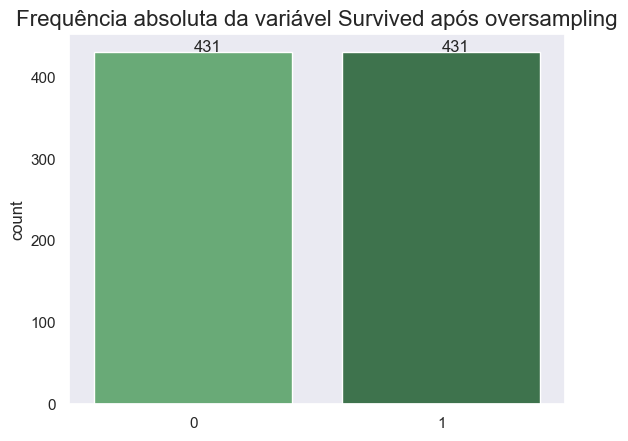

In [12]:
# Countplot da variável alvo no dataset de treino após o oversampling.
sns.set_theme(style="dark") # Define o tema utilizado.

ax = sns.countplot(x=Ytreino, palette = "Greens_d");
ax.set_title("Frequência absoluta da variável Survived após oversampling", fontsize = 16)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.4
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

In [13]:
# DataFrame para comparar a acurácia de cada algoritmo
comparaAlgoritmo = {"Algoritmo": ["Regressão Logística", "Linear Discriminant Analysis", "KNN", "Naive Bayes", "Árvore de Decisão", "SVM", "Random Forest",
                                 "Bagging Classifier", "AdaBoost", "Voting Classifier", "Gradient Tree Boosting", "XGBClassifier"],
                   "Acurácia": ["-", "-", "-", "-", "-", "-","-", "-", "-", "-", "-", "-"],
                   "Acertos": ["-", "-", "-", "-", "-", "-","-", "-", "-", "-", "-", "-"],
                   "Erros": ["-", "-", "-", "-", "-", "-","-", "-", "-", "-", "-", "-"]}
dfComparaAlgoritmo = pd.DataFrame(comparaAlgoritmo)
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,-,-,-
1,Linear Discriminant Analysis,-,-,-
2,KNN,-,-,-
3,Naive Bayes,-,-,-
4,Árvore de Decisão,-,-,-
5,SVM,-,-,-
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


## Regressão Logística
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O algoritmo Regressão Logística, apesar do nome, implementa um **modelo linear** para classificação em vez de regressão. Neste modelo, as probabilidades que descrevem os possíveis resultados são modeladas usando uma função logística. O algoritmo Regressão Logística implementa classificação binária ou multiclasse utilizando regularização. <br>
Regularização é uma técnica de redução de variáveis, onde o coeficiente de cada variável recebe um peso com o objetivo de atribuir níveis de importância. Dessa forma, a depender do método utilizado, as variáveis são classificadas com menor importância ou excluídas do modelo. É muito útil quando o conjunto de dados possui muitas variáveis.<br> 
A regularização procura reduzir as variáveis colineares. Numa análise de regressão, duas variáveis independentes podem estar altamente correlacionadas, mantendo entre si elevada colinearidade, de tal forma que não é possível estabelecer o efeito de cada uma delas sobre a variável dependente. Variáveis colineares carregam as mesmas informações e aumentam o erro do modelo. <br>
Existem três métodos principais de regularização: Ridge Regression, Lasso Regression e Elastic-Net. <br>
O método **Ridge Regression**, também conhecido como Regularização L2, aplica o conceito de penalização, ou seja, atribui menor importância a variáveis colineares utilizando um parâmetro chamado de termo de penalidade, que regulariza os coeficientes das variáveis, de tal forma que, se os coeficientes assumem valores grandes, a variável recebe menor importância. <br>
O método **LASSO Regression**, conhecido como Regularização L1, também utiliza o conceito de penalização das variáveis colineares, mas considera o valor absoluto dos coeficientes das variáveis para penalizá-las. A penalização acontece diminuindo o valor absoluto dos coeficientes das variáveis até convergirem a zero, o que acaba excluindo a variável do modelo. <br>
Já o método **Elastic-Net** é a combinação dos métodos Ridge e LASSO Regression. Essa combinação permite criar um modelo onde alguns dos pesos são diferentes de zero como no método LASSO, mantendo as propriedades de regularização do método Ridge.<br>
A regularização é realizada pelo algoritmo de Regressão Logística durante seu treinamento e ajuda a reduzir o overffitng.<br>
Cada algoritmo possui **parâmetros** que podem ser ajustados pelo cientista de dados com o objetivo de aumentar o desempenho do modelo. Os parâmetros dos algoritmos de machine learning também são chamados na literatura de **hiperparâmetros**. <br>
**Principais parâmetros:**<br>
O parâmetro **Penalty** especifica o método utilizado para regularizar os dados. Se nenhum valor for especificado, a regularização padrão é L2. As opções de penalização são:<br>
- ‘none’: nenhuma penalidade é adicionada;<br>
- ‘l2’: adiciona o termo de penalidade L2 e é a regularização padrão;<br>
- ‘l1’: adiciona o termo de penalidade L1; <br>
- ‘elasticnet’: os termos de penalidade L1 e L2 são adicionados. <br>

Com o parâmetro **Solver**, o cientista de dados informa o algoritmo utilizado na otimização do problema. O padrão é 'lbfgs'. Para escolher um algoritmo, deve-se considerar que para conjuntos de dados pequenos, ‘liblinear’ é uma boa escolha, enquanto ‘sag’ e ‘saga’ são mais rápidos para grandes conjuntos de dados. A escolha do algoritmo depende da penalidade escolhida. Abaixo estão as penalidades suportadas por cada algoritmo:<br>
- ‘newton-cg’ - [‘l2’, ‘none’]
- ‘lbfgs’ - [‘l2’, ‘none’]
- ‘liblinear’ - [‘l1’, ‘l2’]
- ‘sag’ - [‘l2’, ‘none’]
- ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’] <br>
    
O parâmetro **C** define a força da regularização, onde valores menores especificam uma regularização mais forte. Quando nenhum valor é informado, será utilizado o valor padrão igual a 1.

</details>

In [14]:
# Carregando o módulo do algoritmo
from sklearn.linear_model import LogisticRegression

In [15]:
# Criando o modelo
regressaoLogistica = LogisticRegression()

# Treinamento do modelo
regressaoLogistica.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = regressaoLogistica.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 84.92%
Número de acertos: 152
Número de erros: 27


### Pesquisando os melhores parâmetros com GridSearchCV
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

A função GridSearchCV faz uma busca exaustiva pelos melhores parâmetros. Ou seja, ela combina todas as opções possíveis de parâmetros para verificar quais são os melhores. Isso significa que exige bastante recurso computacional e se o conjunto de dados for muito grande, essa tarefa pode demorar horas ou até mesmo dias.

</details>

In [16]:
# Carregando o módulo do algoritmo
from sklearn.model_selection import GridSearchCV

# Esse módulo ignara os avisos.
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "C": [0.001,0.01,0.1,1.0,10,100,1000]
}

# Cria o modelo que desejamos testar os melhores parâmetros
regressaoLogistica = LogisticRegression()

# Cria o objeto do tipo GridSearchCV
gridSearch = GridSearchCV(estimator = regressaoLogistica, param_grid = parametros)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
gridSearch.fit(X, y)

# Print do resultado
print("Acurácia média: %.3f" % (gridSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", gridSearch.best_params_)

Acurácia média: 80.699%
Melhores parâmetros para o modelo: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}


In [18]:
# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in gridSearch.best_params_:
    melhoresParametros.append(gridSearch.best_params_[k])

In [19]:
# Utilizando os melhores parâmetros segundo GridSearchCV
# Criando o modelo
regressaoLogistica = LogisticRegression(C = melhoresParametros[0], penalty = melhoresParametros[1], solver = melhoresParametros[2])

# Treinamento do modelo
regressaoLogistica.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = regressaoLogistica.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 86.03%
Número de acertos: 154
Número de erros: 25


In [ ]:
# Acurácia sem escolher os melhores valores para os parâmetros: 84.92%

### Pesquisando os melhores parâmetros com RandomizedSearchCV
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

Enquanto a função GridSearchCV testa todas as combinações dos possíveis parâmetros, a função RandomizedSearchCV testa de forma aleatória um conjunto de parâmetros. Dessa forma, exige menos recursos computacionais.

</details>

In [20]:
# Carregando o módulo do algoritmo
from sklearn.model_selection import RandomizedSearchCV

In [21]:
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "C": [0.001,0.01,0.1,1.0,10,100,1000]
}

# Cria o modelo que desejamos testar os melhores parâmetros
regressaoLogistica = LogisticRegression()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = regressaoLogistica, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 80.586%
Melhores parâmetros para o modelo: {'solver': 'lbfgs', 'penalty': 'none', 'C': 100}


In [22]:
# Salvando os melhores parâmetros em uma lista
melhoresParametrosLR = []
for k in randomizedSearch.best_params_:
    melhoresParametrosLR.append(randomizedSearch.best_params_[k])

In [23]:
# Utilizando os melhores parâmetros segundo o RandomizedSearchCV
# Criando o modelo
regressaoLogistica = LogisticRegression(solver = melhoresParametrosLR[0], penalty = melhoresParametrosLR[1], C = melhoresParametrosLR[2])

# Treinamento do modelo
regressaoLogistica.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = regressaoLogistica.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 86.03%
Número de acertos: 154
Número de erros: 25


In [ ]:
# Acurácia sem escolher os melhores valores para os parâmetros: 84.92%

In [24]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[0,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[0,2] = numeroAcertos
dfComparaAlgoritmo.iloc[0,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,86.03%,154,25
1,Linear Discriminant Analysis,-,-,-
2,KNN,-,-,-
3,Naive Bayes,-,-,-
4,Árvore de Decisão,-,-,-
5,SVM,-,-,-
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


## Linear Discriminant Analysis
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

Linear Discriminant Analysis é um algoritmo de classificação que cria um **modelo linear**, ajustando densidades condicionais das classes aos dados e usando a regra de Bayes. <br>

**Principais parâmetros:**<br>
Com o parâmetro **Solver**, difinimos o algoritmo utilizado na otimização do problema. O padrão do parâmetro solver é ‘svd’.  As opções de algoritmos são:<br>
- ‘svd’: significa Decomposição de Valor Singular. Essa é a opção padrão, caso nenhum algoritmo seja escolhido. Não calcula a matriz de covariância, portanto este algoritmo é recomendado para dados com um grande número de colunas;<br>
- ‘lsqr’: significa Solução de Mínimos Quadrados. Pode ser combinado com o parâmetro Shrinkage ou com o estimador de covariância personalizado;<br>
- ‘eigen’: significa Decomposição de Autovalor. Pode ser combinado com o parâmetro Shrinkage ou com o estimador de covariância personalizado;<br>

Outro  importante parâmetro é o **Shrinkage**.  Funciona somente com os algoritmos ‘lsqr’ e ‘eigen’. Os possíveis valores desse parâmetro são:<br>
- Nenhum valor, que é o padrão;
- ‘auto’: usa o padrão Ledoit-Wolf;
- valores entre 0 e 1 do tipo float .

</details>

In [25]:
# Carregando o módulo do algoritmo
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "solver": ['svd', 'lsqr', 'eigen'],
    "shrinkage": [0.001,0.01,0.1,0.5,0.8,0.2]
}

# Cria o modelo que desejamos testar os melhores parâmetros
linearDiscriminantAnalysis = LinearDiscriminantAnalysis()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = linearDiscriminantAnalysis, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 79.237%
Melhores parâmetros para o modelo: {'solver': 'eigen', 'shrinkage': 0.01}


In [27]:
# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

In [28]:
# Utilizando os melhores parâmetros segundo o RandomizedSearchCV
# Criando o modelo
linearDiscriminantAnalysis = LinearDiscriminantAnalysis(solver=melhoresParametros[0], shrinkage=melhoresParametros[1])

# Treinamento do modelo
linearDiscriminantAnalysis.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = linearDiscriminantAnalysis.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 85.47%
Número de acertos: 153
Número de erros: 26


In [ ]:
# Acurácia sem escolher os melhores valores para os parâmetros: 85.47%

In [29]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[1,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[1,2] = numeroAcertos
dfComparaAlgoritmo.iloc[1,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,86.03%,154,25
1,Linear Discriminant Analysis,85.47%,153,26
2,KNN,-,-,-
3,Naive Bayes,-,-,-
4,Árvore de Decisão,-,-,-
5,SVM,-,-,-
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


## KNN - K-Nearest Neighbors
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O KNN cria um modelo **não linear** que considera a distância entre os dados para encontrar padrões no dataset. Normalmente, utiliza-se a distância euclidiana para encontrar semelhanças entre os pontos de dados. <br>
É muito importante definir a quantidade de **k**, ou seja, o número de vizinhos. Em geral, um maior número de vizinhos diminui os efeitos do ruído, mas torna os limites de classificação dos grupos menos distintos.<br>
Os dados devem estar normalizados e os outliers devem ser tratados, pois influenciam bastante no algoritmo. <br>
**Principais parâmetros:**<br>
O parâmetro **n_neighbors** define o número de vizinhos. Seu valor padrão é 5.<br>
Com o parâmetro **weights** definimos pesos aos vizinhos. Possíveis valores:<br>
- uniform: todos os pontos de dados recebem o mesmo peso;<br>
- distance: o peso é definido pela distância entre os dados. Neste caso, os vizinhos mais próximos de um ponto de dado terão uma influência maior do que os vizinhos mais distantes.<br>

O KNN utiliza alguns algoritmos para calcular os vizinhos mais próximos e o cientista de dados pode testar o melhor definindo o parâmetro **algorithm**:<br>
- ball_tree;<br>
- kd_tree;<br>
- brute;<br>
- auto: com essa opção o KNN decidirá qual é o algoritmo mais apropriado baseado nos valores dos dados.

</details>

In [30]:
# Carregando o módulo do algoritmo
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9],
    "weights": ['uniform', 'distance'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute']
}

# Cria o modelo que desejamos testar os melhores parâmetros
kNeighborsClassifier = KNeighborsClassifier()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = kNeighborsClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 80.476%
Melhores parâmetros para o modelo: {'weights': 'uniform', 'n_neighbors': 4, 'algorithm': 'brute'}


In [32]:
# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

In [33]:
# Criando o modelo
kNeighborsClassifier = KNeighborsClassifier(weights = melhoresParametros[0], n_neighbors = melhoresParametros[1], algorithm = melhoresParametros[2])

# Treinamento do modelo
kNeighborsClassifier.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = kNeighborsClassifier.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 87.71%
Número de acertos: 157
Número de erros: 22


In [ ]:
# Acurácia sem escolher os melhores valores para os parâmetros: 82.68%
# Acurácia sem normalizar os dados: 74.30%

In [34]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[2,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[2,2] = numeroAcertos
dfComparaAlgoritmo.iloc[2,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,86.03%,154,25
1,Linear Discriminant Analysis,85.47%,153,26
2,KNN,87.71%,157,22
3,Naive Bayes,-,-,-
4,Árvore de Decisão,-,-,-
5,SVM,-,-,-
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


## Naive Bayes
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

Naive Bayes é um algoritmo **não-linear** e **probabilístico**, ou seja, calcula a probabilidade de ocorrência e a probabilidade condicional de cada classe. Assume que os dados estão em uma distribuição Gaussiana, ou seja em uma distribuição Normal, com média igual a zero e desvio padrão igual a 1. <br>
O Naive Bayes possui apenas dois parâmetros e por essa razão, exige uma boa preparação dos dados. Normalmente, não definimos valores para os parâmetros e deixamos o algoritmo encontrar os melhores valores.<br>
Excelente para previsões em tempo real e muito útil para dados no formato de texto.

</details>

In [35]:
# Carregando o módulo do algoritmo
from sklearn.naive_bayes import GaussianNB

In [36]:
# Criando o modelo
gaussianNB = GaussianNB()

# Treinamento do modelo
gaussianNB.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = gaussianNB.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 83.24%
Número de acertos: 149
Número de erros: 30


In [37]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[3,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[3,2] = numeroAcertos
dfComparaAlgoritmo.iloc[3,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,86.03%,154,25
1,Linear Discriminant Analysis,85.47%,153,26
2,KNN,87.71%,157,22
3,Naive Bayes,83.24%,149,30
4,Árvore de Decisão,-,-,-
5,SVM,-,-,-
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


## Árvores de Decisão
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O algoritmo de árvore de decisão utiliza métodos baseados em procura para criar modelos **não-lineares estruturados em árvore de decisão**. A árvore é uma segmentação supervisionada, porque cada folha contém um valor para a variável alvo. Em um projeto supervisionado de classificação, cada folha contém uma classificação para seu segmento. Tal árvore é chamada de árvore de classificação ou, mais livremente, árvore de decisão. <br>
Não exige muita preparação dos dados e é indiferente quanto à normalização e à padronização. <br>
O algoritmo de árvore de decisão pode criar árvores super complexas que não generalizam bem os dados. Esse problema é chamado de overfitting. Uma solução para o overfitting gerado pela árvore de decisão é realizar a poda da árvore, que em inglês é conhecida como pruning. Realizar a poda significa eliminar alguns dos ramos inferiores da árvore, de forma a atenuar o efeito dos ruídos, que são informações inúteis para a classificação, de forma a manter na árvore apenas regras com maior poder de distinguir as classes.<br>
Para realizar a poda podemos fazer ajustes nos parâmetros do algoritmo. A poda pode ser feita definindo o número mínimo de amostras necessárias em um nó folha com o parâmetro **min_samples_split** ou definindo a profundidade máxima da árvore com o parâmetro **max_depth**. 
Outros importantes parâmetros: <br>
Com o parâmetro **criterion** podemos medir a qualidade dos nós da árvore. Os valores suportados por este parâmetro são:<br>
- gini para a impureza; <br>
- log_loss e entropia, ambos para o ganho de informação. <br>
    
O parâmetro **splitter** define a estratégia usada para escolher a divisão em cada nó. As estratégias suportadas são: <br>
- best: para escolher a melhor divisão; e <br>
- random: para escolher a melhor divisão aleatória.<br>

</details>

In [38]:
# Carregando o módulo do algoritmo
from sklearn.tree import DecisionTreeClassifier 

In [39]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "min_samples_split": [2, 3, 4, 5, 6],
    "max_depth": [100, 150, 200, 350, 400, 550],
    "criterion": ['gini', 'log_loss', 'entropia'],
    "splitter": ["best", "random"]
}

# Cria o modelo que desejamos testar os melhores parâmetros
decisionTreeClassifier = DecisionTreeClassifier(random_state=81)

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = decisionTreeClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 81.933%
Melhores parâmetros para o modelo: {'splitter': 'random', 'min_samples_split': 6, 'max_depth': 550, 'criterion': 'log_loss'}


In [40]:
# Salvando os melhores parâmetros em uma lista
melhoresParametrosAD = []
for k in randomizedSearch.best_params_:
    melhoresParametrosAD.append(randomizedSearch.best_params_[k])

In [41]:
# Criando o modelo
decisionTreeClassifier = DecisionTreeClassifier(splitter = melhoresParametrosAD[0], 
                                     min_samples_split = melhoresParametrosAD[1],
                                     max_depth = melhoresParametrosAD[2],
                                     criterion = melhoresParametrosAD[3],
                                     random_state=50)

# Treinamento do modelo
decisionTreeClassifier.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = decisionTreeClassifier.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 86.03%
Número de acertos: 154
Número de erros: 25


In [ ]:
# Acurácia sem escolher os melhores valores para os parâmetros: 79.33%

In [42]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[4,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[4,2] = numeroAcertos
dfComparaAlgoritmo.iloc[4,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,86.03%,154,25
1,Linear Discriminant Analysis,85.47%,153,26
2,KNN,87.71%,157,22
3,Naive Bayes,83.24%,149,30
4,Árvore de Decisão,86.03%,154,25
5,SVM,-,-,-
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


## SVM - Support Vector Machines
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O objetivo do algoritmo SVM é encontrar o hiperplano, que é responsável por dividir os dados entre suas respectivas classes. Para calcular o hiperplano, o algoritmo precisa encontrar as margens, que também são chamadas de vetores de suporte. Os vetores de suporte definem os limites de cada classe. O hiperplano deve estar exatamente ao centro entre os vetores, ou seja, a distância entre o hiperplano e cada vetor de suporte deve ser a mesma. O hiperplano e os vetores de suporte são calculados durante o treinamento do modelo. <br>
O algoritmo é muito sensível a outliers, visto que, o outlier afeta diretamente o cálculo da margem de cada classe. Logo, exige grande preparação dos dados, visto que, os ruídos podem prejudicar a definição dos vetores. Funciona muito bem com dados, onde existe uma clara margem de separação dos dados. <br>
Consegue classificar os dados linearmente separáveis, como também aqueles que não são linearmente separáveis. Quando os dados não são linearmente separáveis o algoritmo SVM eleva os dados a uma terceira dimensão, ou a uma dimensão superior, onde consegue traçar o hiperplano. De fato, ao elevar os dados a uma dimensão superior, o algoritmo SVM oferece uma separação linear dos dados.<br>
Principais parâmetros:<br>
Com o parâmetro **C** definimos a regularização Ridge Regression do algoritmo e deve ser um valor positivo. <br>
O parâmetro **kernel** especifica o tipo de kernel que será utilizado pelo algoritmo. As opções são linear, poly, rbf e sigmoid. <br> 
Outro parâmetro bastante importante é o **decision_function_shape** com as opções ovo e ovr.


</details>

In [43]:
# Carregando o módulo do algoritmo
from sklearn.svm import SVC

In [44]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
   "C": [0.001,0.01,0.1,1.0],
   "kernel": ["linear", "poly", "rbf", "sigmoid"],
   "decision_function_shape": ["ovo", "ovr"]
}

# Cria o modelo que desejamos testar os melhores parâmetros
svc = SVC()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = svc, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 80.585%
Melhores parâmetros para o modelo: {'kernel': 'poly', 'decision_function_shape': 'ovr', 'C': 1.0}


In [45]:
# Salvando os melhores parâmetros em uma lista
melhoresParametrosSVM = []
for k in randomizedSearch.best_params_:
    melhoresParametrosSVM.append(randomizedSearch.best_params_[k])

In [46]:
# Criando o modelo
svc = SVC(kernel = melhoresParametrosSVM[0], decision_function_shape = melhoresParametrosSVM[1], C = melhoresParametrosSVM[2])

# Treinamento do modelo
svc.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = svc.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 87.15%
Número de acertos: 156
Número de erros: 23


In [ ]:
# Acurácia sem escolher os melhores valores para os parâmetros: 84.92%
# Acurácia sem normalizar os dados: 69.97%

In [47]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[5,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[5,2] = numeroAcertos
dfComparaAlgoritmo.iloc[5,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,86.03%,154,25
1,Linear Discriminant Analysis,85.47%,153,26
2,KNN,87.71%,157,22
3,Naive Bayes,83.24%,149,30
4,Árvore de Decisão,86.03%,154,25
5,SVM,87.15%,156,23
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


# Métodos Ensemble
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

Método ensemble é uma técnica de aprendizado de máquina que combina o resultado de múltiplos modelos com o objetivo de produzir um melhor modelo preditivo. 

</details>

## Random Forest
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

Random Forest cria uma floresta aleatória com muitas árvores de decisão. O Random Forest seleciona algumas amostras dos dados, de maneira aleatória, por meio do Bootstrap, um método de reamostragem que permite dados repetidos na seleção. Para criar os nós das árvores, também existe uma etapa aleatória, na qual algumas variáveis são selecionadas de forma randômica. Por fim, a combinação é obtida votando no melhor entre os modelos, caso seja um problema de classificação, ou pela média dos modelos, caso seja um problema de regressão. Em contraste com a proposta original do algoritmo, a implementação do scikit-learn combina os modelos pela média de sua previsão probabilística, ao invés da votação em problemas de classificação. <br>
Principais parâmetros: <br>
**n_estimators**: define o número de árvores da floresta. O valor padrão é 100;<br>
**criterion**: função utilizada para medir a qualidade de uma divisão. Os possíveis valores são: gini, entropy, log_loss;<br>
**max_depth**: define a profundidade máxima da árvore. Se nenhum valor é informado, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham uma  quantidade  de amostras menor do que foi definida no parâmetro min_samples_split.<br>
**min_samples_split**: define o número mínimo de amostras necessárias para dividir um nó interno.

</details>

In [48]:
# Carregando o módulo do algoritmo
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "n_estimators": [100, 150, 250, 300, 400, 550],
    "criterion": ['gini', 'log_loss', 'entropia'], 
    "max_depth": [100, 150, 200, 350, 400, 550],
    "min_samples_split": [2, 3, 4, 5, 6] 
}

# Cria o modelo que desejamos testar os melhores parâmetros
randomForestClassifier = RandomForestClassifier(random_state=81)

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = randomForestClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 84.178%
Melhores parâmetros para o modelo: {'n_estimators': 400, 'min_samples_split': 5, 'max_depth': 400, 'criterion': 'log_loss'}


In [50]:
# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

In [51]:
# Criando o modelo
randomForestClassifier = RandomForestClassifier(n_estimators = melhoresParametros[0], 
                                min_samples_split = melhoresParametros[1], 
                                max_depth = melhoresParametros[2],
                                criterion = melhoresParametros[3],
                                random_state=92)

# Treinamento do modelo
randomForestClassifier.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = randomForestClassifier.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 87.15%
Número de acertos: 156
Número de erros: 23


In [ ]:
# Acurácia sem escolher os melhores valores para os parâmetros: 86.59%

In [52]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[6,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[6,2] = numeroAcertos
dfComparaAlgoritmo.iloc[6,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,86.03%,154,25
1,Linear Discriminant Analysis,85.47%,153,26
2,KNN,87.71%,157,22
3,Naive Bayes,83.24%,149,30
4,Árvore de Decisão,86.03%,154,25
5,SVM,87.15%,156,23
6,Random Forest,87.15%,156,23
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


## Bagging Classifier
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

Bagging Classifier é um algoritmo Ensemble que combina o resultado de múltiplos modelos de um mesmo algoritmo, com base na média ou por votação, com o objetivo de produzir um melhor modelo preditivo. Esse algoritmo normalmente é usado como uma forma de reduzir a variância de um modelo base, por exemplo, uma árvore de decisão, introduzindo a aleatoriedade em seu procedimento de construção, e em seguida, construindo um modelo mais preciso. <br>
Nós trabalhamos diferente com o algoritmo Bagging Classifier, visto que, não alteramos os seus parâmetros. De fato, utilizamos os melhores parâmetros escolhidos para o modelo base. 

</details>

In [53]:
# Carregando o módulo do algoritmo
from sklearn.ensemble import BaggingClassifier

In [54]:
# Cria o modelo de árvore de decisão
decisionTreeClassifierVT = DecisionTreeClassifier(splitter = melhoresParametrosAD[0], 
                                     min_samples_split = melhoresParametrosAD[1],
                                     max_depth = melhoresParametrosAD[2],
                                     criterion = melhoresParametrosAD[3],
                                     random_state=50)

# Criando o modelo Bagging Classifier
baggingClassifier = BaggingClassifier(base_estimator = decisionTreeClassifierVT, random_state = 1)

# Treinamento do modelo
baggingClassifier.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = baggingClassifier.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 87.71%
Número de acertos: 157
Número de erros: 22


In [ ]:
# Acurácia do modelo Árvore de Decisão sem utilizar o Bagging Classifier: 83,80%

In [55]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[7,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[7,2] = numeroAcertos
dfComparaAlgoritmo.iloc[7,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,86.03%,154,25
1,Linear Discriminant Analysis,85.47%,153,26
2,KNN,87.71%,157,22
3,Naive Bayes,83.24%,149,30
4,Árvore de Decisão,86.03%,154,25
5,SVM,87.15%,156,23
6,Random Forest,87.15%,156,23
7,Bagging Classifier,87.71%,157,22
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


## AdaBoost
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O algoritmo AdaBoost treina uma sequência de algoritmos fracos em repetidas amostras do conjunto de dados. Em problemas de regressão, as previsões de todos estes modelos são então combinadas por meio de uma soma ponderada para produzir a previsão final. AdaBoost utiliza a técnica Boosting. Essa técnica funciona da seguinte forma, inicialmente, todos os dados do conjunto de treinamento recebem um peso idêntico. Então, o modelo é treinado usando o conjunto de treinamento. Em seguida, o erro do modelo no conjunto de treinamento é calculado, com base em quantos objetos foram classificados de forma correta e quantos foram classificados incorretamente. Na sequência, os pesos são atualizados com base nos erros do modelo. Sendo assim, um novo modelo é treinado usando o conjunto de pesos modificados. Novamente, o erro é calculado, novos pesos são atribuídos e mais uma vez um modelo é treinado. E o processo se repete até o número de iterações inicialmente definido. <br>
Principais parâmetros: <br>
- **n_estimator**: define o máximo de modelos utilizados pelo Boosting do algoritmo;<br>
- **learning_rate**: define o peso aplicado para cada modelo de cada iteração do Boosting. Um valor alto aumenta a contribuição de cada modelo;<br>
- **algorithm**: define o algoritmo para calcular o boosting.


</details>

In [56]:
# Carregando o módulo do algoritmo
from sklearn.ensemble import AdaBoostClassifier

In [57]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
   "n_estimators": [50, 100, 150],
   "learning_rate": [0.1, 0.5, 1.0, 1.5],
   "algorithm": ["SAMME", "SAMME.R"]
}

# Cria o modelo que desejamos testar os melhores parâmetros
adaBoostClassifier = AdaBoostClassifier()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = adaBoostClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 82.723%
Melhores parâmetros para o modelo: {'n_estimators': 100, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}


In [58]:
# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

In [59]:
# Criando o modelo
adaBoostClassifier = AdaBoostClassifier(n_estimators=melhoresParametros[0],
                           learning_rate=melhoresParametros[1],
                           algorithm=melhoresParametros[2])

# Treinamento do modelo
adaBoostClassifier.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = adaBoostClassifier.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 86.03%
Número de acertos: 154
Número de erros: 25


In [ ]:
# Acurácia sem escolher os melhores valores para os parâmetros: 84.92%

In [60]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[8,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[8,2] = numeroAcertos
dfComparaAlgoritmo.iloc[8,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,86.03%,154,25
1,Linear Discriminant Analysis,85.47%,153,26
2,KNN,87.71%,157,22
3,Naive Bayes,83.24%,149,30
4,Árvore de Decisão,86.03%,154,25
5,SVM,87.15%,156,23
6,Random Forest,87.15%,156,23
7,Bagging Classifier,87.71%,157,22
8,AdaBoost,86.03%,154,25
9,Voting Classifier,-,-,-


## Voting Classifier
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

A ideia por trás do Voting Classifier é combinar algoritmos de aprendizado de máquina conceitualmente diferentes e usar votação majoritária ou as probabilidades previstas médias para prever as classes. O modelo final pode ser útil para equilibrar as fraquezas individuais de cada modelo. <br>
Normalmente, não alteramos os parâmetros do algoritmo Voting Classifier e utilizamos os melhores parâmetros de cada algoritmo que será combinado.

</details>

In [61]:
# Carregando o módulo do algoritmo
from sklearn.ensemble import VotingClassifier

In [62]:
# Criando os modelos
listaDeModelos = []

# Cria o modelo Regressão Logística
regressaoLogisticaVT = LogisticRegression(solver = melhoresParametrosLR[0], penalty = melhoresParametrosLR[1], C = melhoresParametrosLR[2])
listaDeModelos.append(('Regressão Logística', regressaoLogisticaVT))

# Cria o modelo Árvore de Decisão
decisionTreeClassifierVT = DecisionTreeClassifier(splitter = melhoresParametrosAD[0], 
                                     min_samples_split = melhoresParametrosAD[1],
                                     max_depth = melhoresParametrosAD[2],
                                     criterion = melhoresParametrosAD[3],
                                     random_state=14)
listaDeModelos.append(('Árvore de Decisão', decisionTreeClassifierVT))

# Cria o modelo SVM
svcVT = SVC(kernel = melhoresParametrosSVM[0], decision_function_shape = melhoresParametrosSVM[1], C = melhoresParametrosSVM[2])
listaDeModelos.append(('SVM', svcVT))

# Criando o modelo Voting Classifier
votingClassifier = VotingClassifier(listaDeModelos)

# Treinamento do modelo
votingClassifier.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = votingClassifier.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 90.50%
Número de acertos: 162
Número de erros: 17


In [ ]:
# Acurácia sem escolher os melhores valores para os parâmetros: 88.27%

In [63]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[9,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[9,2] = numeroAcertos
dfComparaAlgoritmo.iloc[9,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,86.03%,154,25
1,Linear Discriminant Analysis,85.47%,153,26
2,KNN,87.71%,157,22
3,Naive Bayes,83.24%,149,30
4,Árvore de Decisão,86.03%,154,25
5,SVM,87.15%,156,23
6,Random Forest,87.15%,156,23
7,Bagging Classifier,87.71%,157,22
8,AdaBoost,86.03%,154,25
9,Voting Classifier,90.50%,162,17


## Gradient Tree Boosting
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O algoritmo Ensemble Gradient Tree Boosting implementa a técnica Boosting e é bastante preciso e eficaz, podendo ser utilizado em problemas de classificação e regressão. <br>
Principais parâmetros: <br>
- **n_estimators**: define o máximo de modelos utilizados pelo Boosting do algoritmo; <br>
- **learning_rate**: define o peso aplicado para cada modelo de cada iteração do Boosting. Um valor alto aumenta a contribuição de cada modelo.

</details>

In [64]:
# Carregando o módulo do algoritmo
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
   "n_estimators": [100, 110, 150],
   "learning_rate": [0.1, 0.5, 1.0, 1.5],
}

# Cria o modelo que desejamos testar os melhores parâmetros
gradientBoostingClassifier = GradientBoostingClassifier()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = gradientBoostingClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 84.290%
Melhores parâmetros para o modelo: {'n_estimators': 110, 'learning_rate': 0.1}


In [66]:
# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

In [67]:
# Criando o modelo
gradientBoostingClassifier = GradientBoostingClassifier(n_estimators = melhoresParametros[0],
                                   learning_rate=melhoresParametros[1]
                                   )

# Treinamento do modelo
gradientBoostingClassifier.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = gradientBoostingClassifier.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 88.27%
Número de acertos: 158
Número de erros: 21


In [ ]:
# Acurácia sem escolher os melhores valores para os parâmetros: 88.27%

In [68]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[10,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[10,2] = numeroAcertos
dfComparaAlgoritmo.iloc[10,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,86.03%,154,25
1,Linear Discriminant Analysis,85.47%,153,26
2,KNN,87.71%,157,22
3,Naive Bayes,83.24%,149,30
4,Árvore de Decisão,86.03%,154,25
5,SVM,87.15%,156,23
6,Random Forest,87.15%,156,23
7,Bagging Classifier,87.71%,157,22
8,AdaBoost,86.03%,154,25
9,Voting Classifier,90.50%,162,17


## XGBoost
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

XGBoost não é simplesmente um algoritmo de aprendizado de máquina, mas sim, uma biblioteca projetada para ser altamente eficiente, flexível e portátil. Sua biblioteca implementa algoritmos de aprendizado de máquina sob a estrutura Gradient Boosting. A maioria dos algoritmos da biblioteca XGBoost, incluindo treinamento, previsão e avaliação, pode ser acelerada com GPUs compatíveis com CUDA. Ou seja, é uma opção fácil quando se deseja realizar o treinamento de grandes conjuntos de dados utilizando GPU. <br>
Não é implementado pela biblioteca Scikit-Learn e não é instalado junto com a distribuição Anaconda, e por essa razão, precisa ser instalado. <br>
Principais parâmetros: <br>
- **tree method**: define o algoritmo de construção de árvore usado no XGBoost. Existem 4 opções de algoritmos: exact, approx, hist e gpu_hist. <br>
- **booster**: define o Booster utilizado pelo algoritmo. As opções de Booster são gbtree, gblinear ou dart. Gbtree e dart usam modelos baseados em árvores, enquanto que gblinear utiliza funções lineares. <br>
- **nthread**: define o número de processos paralelos utilizados durante a execução do algoritmo. <br>
- **colsample_bynode**: define a proporção de subamostra de colunas para cada nó da árvore. A subamostragem ocorre uma vez, toda vez que um novo nó é avaliado. <br>
- **learning_rate**: parâmetro utilizado pare prevenir o overfitting, atribuindo pezos para as variáveis. <br>
- **max_depth**: define a profundidade máxima de uma árvore. Aumentar esse valor tornará o modelo mais complexo e com maior probabilidade de overfitting. 0 indica que não há limite de profundidade. <br>
- **num_parallel_tree**: define o número de árvores paralelas construídas durante cada iteração. Esta opção é usada para suportar Boosted Random Forest. <br>
- **subsample**: define a proporção de subamostras dos dados de treino. Por exemplo, ao definir a proporção de subamostras em 0.5, significa que o XGBoost criará amostras aleatoriamente em metade dos dados de treino antes de criar as árvores. Esta estratégia ajuda a reduzir o overfitting.<br> <br>

Site da documentação https://xgboost.readthedocs.io/en/stable/index.html

</details>

In [ ]:
# Instalando um pacote
# !pip install xgboost

In [69]:
# Verificando a versão instalada de um pacote
!pip show xgboost

Name: xgboost
Version: 1.7.5
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: 
Author-email: 
License: Apache-2.0
Location: c:\users\pinad\anaconda3\lib\site-packages
Requires: numpy, scipy
Required-by: 


In [70]:
from xgboost import XGBClassifier

In [71]:
# Criando o modelo
xgb = XGBClassifier(tree_method='gpu_hist',
                    booster='gbtree',  
                    nthread=16,
                    colsample_bynode= 0.8,
                    learning_rate= 0.25,
                    max_depth= 5,
                    num_parallel_tree= 15,
                    subsample= 0.5
                   )

# Criando o modelo sem acesso a GPU e com o valor padrão para os parâmetros
# xgb = XGBClassifier()

# Treinamento do modelo
xgb.fit(Xtreino, Ytreino)

# Previsões com os dados de teste
previsoes = xgb.predict(Xteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 89.94%
Número de acertos: 161
Número de erros: 18


In [72]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[11,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[11,2] = numeroAcertos
dfComparaAlgoritmo.iloc[11,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,86.03%,154,25
1,Linear Discriminant Analysis,85.47%,153,26
2,KNN,87.71%,157,22
3,Naive Bayes,83.24%,149,30
4,Árvore de Decisão,86.03%,154,25
5,SVM,87.15%,156,23
6,Random Forest,87.15%,156,23
7,Bagging Classifier,87.71%,157,22
8,AdaBoost,86.03%,154,25
9,Voting Classifier,90.50%,162,17


In [73]:
# Ordena o DataFrame de acordo a quantidade de acertos, em ordem descrecente
dfComparaAlgoritmo.sort_values(by=["Acertos"], ascending=False, inplace=True)
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
9,Voting Classifier,90.50%,162,17
11,XGBClassifier,89.94%,161,18
10,Gradient Tree Boosting,88.27%,158,21
2,KNN,87.71%,157,22
7,Bagging Classifier,87.71%,157,22
5,SVM,87.15%,156,23
6,Random Forest,87.15%,156,23
0,Regressão Logística,86.03%,154,25
4,Árvore de Decisão,86.03%,154,25
8,AdaBoost,86.03%,154,25


# Salvando, carregando e usando o modelo criado

In [74]:
# Selecionando o modelo final
modeloSelecionado = dfComparaAlgoritmo.iloc[0,0]

if modeloSelecionado == 'Regressão Logística':
    modeloFinal = regressaoLogistica
elif modeloSelecionado == 'Linear Discriminant Analysis':
    modeloFinal= linearDiscriminantAnalysis
elif modeloSelecionado == 'KNN':
    modeloFinal = kNeighborsClassifier
elif modeloSelecionado == 'Naive Bayes':
    modeloFinal = gaussianNB
elif modeloSelecionado == 'Árvore de Decisão':
    modeloFinal = decisionTreeClassifier
elif modeloSelecionado == 'SVM':
    modeloFinal = svc
elif modeloSelecionado == 'Random Forest':
    modeloFinal = randomForestClassifier
elif modeloSelecionado == 'Bagging Classifier':
    modeloFinal = baggingClassifier
elif modeloSelecionado == 'AdaBoost':
    modeloFinal = adaBoostClassifier
elif modeloSelecionado == 'Voting Classifier':
    modeloFinal = votingClassifier
elif modeloSelecionado == 'Gradient Tree Boosting':
    modeloFinal = gradientBoostingClassifier
elif modeloSelecionado == 'XGBClassifier':
    modeloFinal = xgb

modeloFinal

VotingClassifier(estimators=[('Regressão Logística',
                              LogisticRegression(C=100, penalty='none')),
                             ('Árvore de Decisão',
                              DecisionTreeClassifier(criterion='log_loss',
                                                     max_depth=550,
                                                     min_samples_split=6,
                                                     random_state=14,
                                                     splitter='random')),
                             ('SVM', SVC(kernel='poly'))])

## Salvando e carregando o modelo
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O módulo **pickle** implementa protocolos binários para serializar e desserilizar um objeto Python. **Pickling** é o processo pelo qual um objeto Python é convertido em um fluxo de bytes, e **unpickling** é a operação inversa, pela qual um fluxo de bytes de um arquivo binário ou objeto semelhante a bytes é convertido novamente em um objeto.

</details>

In [75]:
# Carregando o módulo
import pickle

In [76]:
# Salvando o modelo
arquivo = 'Dados/Titanic/modeloClassificadorFinal.sav'
pickle.dump(modeloFinal, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


In [77]:
# Carregando o modelo
modeloClassificador = pickle.load(open(arquivo, 'rb'))
print("Modelo carregado!")

Modelo carregado!


In [78]:
# Fazendo previsões
previsoes = modeloClassificador.predict(Xteste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)